First Notebook

In [3]:
# processing = connection = translation
#   filtering
#   FFT
#   radial profile
#   smoothing
# analysis = disjunction = selection, slicing
#   peak finding
# visualization = conjunction = parametrization, application

In [4]:
import mrcfile
import numpy as np
from matplotlib import pyplot as plt

# MRC file -> 2D np array
def readFile(mrc_file):
    with mrcfile.open(mrc_file,'r') as img:
        data = img.data.astype(np.float32)
        meta = img.header
    
    return data
    # return (data,meta)

# 2D np array -> FFT
def getFFT(data):
    fft = np.fft.fft2(data)
    fft_shift = np.fft.fftshift(fft)
    return np.log(np.abs(fft_shift))

# FFT -> radial profile
def getRadialProfile(data):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - data.shape[1]/2)**2 + (y - data.shape[0]/2)**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    
    return tbin / nr

In [5]:
import pandas
import sys
import numpy

# prevent array truncation
numpy.set_printoptions(threshold=sys.maxsize)

def analyzeImages(images,save_interval=5,file_destination='test.csv'):
    dataframe = {
        'image':{},
        'radial_profile':{}}
        
    for (index,img) in enumerate(images):
        data = -1

        try:
            data = readFile('./Images/'+img)
            data = getFFT(data)
            data = getRadialProfile(data)



            print(data)
        except:
            pass

        dataframe['image'][index] = img
        dataframe['radial_profile'][index] = data

        if (index % save_interval == 0):
            pandas.DataFrame(data=dataframe).to_csv(file_destination)

In [6]:
images = [
    'bsa_zif_1hr_1.mrc',
    '14_2_2-30k-14df.mrc',
    '14_3_36-30k-12df.mrc',
    '14_6_37-30k-13df.mrc',
    '14_10_47-30k-12df.mrc',
    '14_11_26-30k-12df.mrc',
    'PH2_10_9_4-30k-13df.mrc',
    'PH2_11_12_30-30k-12df.mrc',
    'PH2_11_9_8-30k-11df.mrc',
    'PH2_30_1_19-30k-11df.mrc',
    'PH2_7-2_61-30k-df15.mrc',
    'PH2_7-4_10-30k-11df.mrc',
    ]   

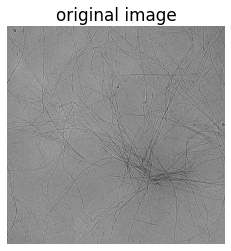

In [7]:
plt.rcParams.update({'font.size':14})

data = readFile('./PH2_7-6_21-20k-12df.mrc')
plt.axis('off')
plt.figure(1,figsize=(5,5))
plt.title('original image')
plt.imshow(data, cmap='gray')


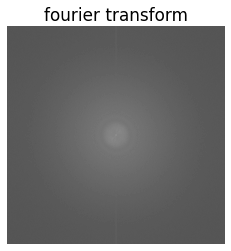

In [8]:
plt.rcParams.update({'font.size':14})

data = getFFT(data)
plt.axis('off')
plt.figure(1,figsize=(5,5))
plt.title('fourier transform')
plt.imshow(data, cmap='gray')


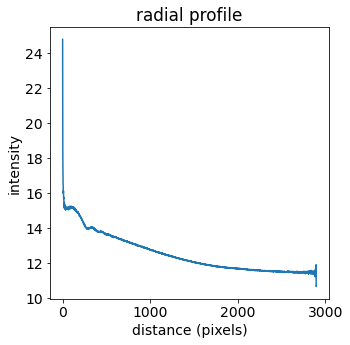

In [9]:
plt.rcParams.update({'font.size':14})
data2 = getRadialProfile(data)
plt.figure(1,figsize=(5,5))
plt.xlabel('distance (pixels)')
plt.ylabel('intensity')
plt.title('radial profile')
plt.plot(data2)
# data2

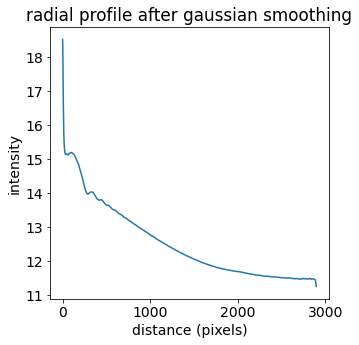

In [10]:
from scipy.ndimage import gaussian_filter1d
data2 = getRadialProfile(data)
plt.figure(1,figsize=(5,5))
plt.xlabel('distance (pixels)')
plt.ylabel('intensity')
plt.title('radial profile after gaussian smoothing')
data3 = gaussian_filter1d(data2,5)
plt.plot(data3)

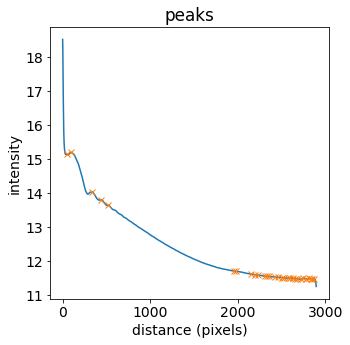

In [13]:
from scipy.signal import find_peaks
data4 = find_peaks(data3, height=0)[0]

plt.figure(1,figsize=(5,5))
plt.xlabel('distance (pixels)')
plt.ylabel('intensity')
plt.title('peaks')

plt.plot(data3)
plt.plot(data4, data3[data4], 'x')